# résolution SDE par Euler et Milstein

## I - partie Maths

On a le système stochastique différentiel suivant :     
$$
\begin{cases}
\mathrm{d}A_{t} &= \mu_{t} \mathrm{d}t + \sigma_{t} \mathrm{d}B_{t}  \\
\mathrm{d}Z_{t} &= \alpha Z_{t} \mathrm{d}t + \beta Z_{t} \mathrm{d}W_{t}  \\
\mathrm{d}<W,B>_{t} &= \rho \mathrm{d}t
\end{cases}
$$

Notre but sera de résoudre ce système par deux méthodes différentes, le schéma d'Euler Mayurama et le schéma de Milstein. On distinguera aussi deux cas.

### I-1 Les différents cas 

**Cas n°1**   


$$
\begin{cases}
\mathrm{d}A_{t} &= \mu A_{t} \mathrm{d}t + \sigma Z_{t} A_{t} \mathrm{d}B_{t}  \\
\mathrm{d}Z_{t} &= \alpha Z_{t} \mathrm{d}t + \beta Z_{t} \mathrm{d}W_{t}  \\
\mathrm{d}<W,B>_{t} &= 0 \\
A_{0} &= 10 \\
Z_{0} &= 1 \\
\end{cases}
$$

**Cas n°2**  

$$
\begin{cases}
\mathrm{d}A_{t} &= \mu A_{t} \mathrm{d}t + \sigma \sqrt{Z_{t}} A_{t} \mathrm{d}B_{t}  \\
\mathrm{d}Z_{t} &= \alpha Z_{t} \mathrm{d}t + \beta Z_{t} \mathrm{d}W_{t}  \\
\mathrm{d}<W,B>_{t} &= \rho d_{t} \\
A_{T} &= 100 \\
Z_{T} &= 2 \\
\end{cases}
$$

On remarque que la différence se fait sur le processus $(A_{t})_{t \geq 0}$ ainsi que sur les conditions. Dans le premier cas on est sur des conditions initiales là où pour le 2nd, on est sur des conditions (terminales ?).

## I-2 résolution par Euler 

pour le **cas n°1**, on a besoin de d'Euler mais de sa version forward (donc méthode des rectangles à gauche).   
Déjà il faut identifier les fonctions.    
pour le cas 1: 
$$
\begin{align*}
    a_{A}(t,x ) &= \mu x \\
    b_{A}(t,x, z) &= \sigma x z \\
    a_{Z}(t,z) &= \alpha z \\
    b_{Z}(t, z ) &= \beta z \\ 
\end{align*}
$$

En l'appliquant sur notre système, on trouve les chaînes de Markov $(\tilde A_{k})_{0 \leq k \leq N}$ et $(\tilde Z_{k})_{0 \leq k \leq N}$ tel que :      

$$
\begin{cases}
\tilde A_{k+1} &= \tilde A_{k} + a_{A}(t_{k} , \tilde A_{k} ) \Delta t + b_{A}(t_{k} ,\tilde A_{k}, \tilde Z_{k} ) \Delta B_{k}  \\
\tilde Z_{k+1} &= \tilde Z_{k} + a_{Z}(t_{k} ,\tilde Z_{k} ) \Delta t + b_{Z}(t_{k},\tilde Z_{k} ) \Delta W_{k} \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{0} &= 10 \\
\tilde Z_{0} &= 1 \\
\end{cases}
$$

Ce qui peut aussi s'écrire : 
$$
\begin{cases}
\tilde A_{k+1} &= \tilde A_{k} + \mu A_{k} \Delta t + \sigma Z_{k} A_{k} \Delta B_{k}  \\
\tilde Z_{k+1} &= \tilde Z_{k} + \alpha Z_{k} \Delta t + \beta Z_{k} \Delta W_{k} \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{0} &= 10 \\
\tilde Z_{0} &= 1 \\
\end{cases}
$$

Pour **le cas n°2**, on a besoin de la formulation backward d'Euler (donc méthode des rectangles à droite). On doit identifier nos fonctions : 
$$
\begin{align*}
    a_{A}(t,x ) &= \mu x \\
    b_{A}(t,x, z) &= \sigma x \sqrt{z} \\
    a_{Z}(t,z ) &= \alpha z \\
    b_{Z}(t, z ) &= \beta z \\ 
\end{align*}
$$

En l'appliquant sur notre système, on trouve les chaînes de Markov $(\tilde A_{k})_{0 \leq k \leq N}$ et $(\tilde Z_{k})_{0 \leq k \leq N}$ tel que :      

$$
\begin{cases}
\tilde A_{k} &= \tilde A_{k+1} - a_{A}(t_{k+1} , \tilde A_{k+1} ) \Delta t - b_{A}(t_{k+1} ,\tilde A_{k+1}, \tilde Z_{k+1} ) \Delta B_{k}  \\
\tilde Z_{k} &= \tilde Z_{k+1} - a_{Z}(t_{k+1} ,\tilde Z_{k+1} ) \Delta t - b_{Z}(t_{k+1},\tilde Z_{k+1} ) \Delta W_{k} \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{T} &= 100 \\
\tilde Z_{T} &= 2 \\
\end{cases}
$$

Ce qui s'écrit aussi :
$$
\begin{cases}
\tilde A_{k} &= \tilde A_{k+1} - \mu A_{k+1} \Delta t - \sigma \sqrt{Z_{k+1}} A_{k+1} \Delta B_{k}  \\
\tilde Z_{k} &= \tilde Z_{k+1} - \alpha Z_{k} \Delta t - \beta Z_{k+1} \Delta W_{k} \\
\mathrm{d}<W,B>_{k} &= \rho \Delta t \\
\tilde A_{T} &= 100 \\
\tilde Z_{T} &= 2 \\
\end{cases}
$$

## I - 3 Résolution par milstein 

Tout d'abord une note importante sur la méthode de Milstein, elle n'est valade que pour les EDS autonomes, donc qui ne dépendent que de la variable d'état et pas explicitement du temps. Ici c'est bien notre cas car en réalité nos fonctions $a_{A},a_{Z},b_{A},b_{Z}$ ne sont en réalités pas des fonctions du temps. Il est donc légitime d'utiliser Milstein.   

Pour le **cas n°1**, En l'appliquant sur notre système,  on trouve les chaînes de Markov $(\tilde A_{k})_{0 \leq k \leq N}$ et $(\tilde Z_{k})_{0 \leq k \leq N}$ tel que :      

$$
\begin{cases}
\tilde A_{k+1} &= \tilde A_{k} + a_{A}( \tilde A_{k} ) \Delta t + b_{A}(\tilde A_{k}, \tilde Z_{k} ) \Delta B_{k} + \frac{1}{2} b_{A}(\tilde A_{k}, \tilde Z_{k} )  \frac{\partial }{\partial x}b_{A} (\tilde A_{k},\tilde Z_{k}) \Bigl[ (\Delta B_{k})^{2} - \Delta t \Bigr] \\
\tilde Z_{k+1} &= \tilde Z_{k} + a_{Z}(\tilde Z_{k} ) \Delta t + b_{Z}(\tilde Z_{k} ) \Delta W_{k} + \frac{1}{2} b_{Z}(\tilde Z_{k} )  \frac{\partial }{\partial z}b_{Z} (\tilde Z_{k}) \Bigl[ (\Delta W_{k})^{2} - \Delta t \Bigr] \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{0} &= 10 \\
\tilde Z_{0} &= 1 \\
\end{cases}
$$

Ce qui s'écrit aussi :
$$
\begin{cases}
\tilde A_{k+1} &= \tilde A_{k} + \mu \tilde A_{k} \Delta t + \sigma \tilde Z_{k} \tilde A_{k} \Delta B_{k} + \frac{1}{2} \bigl( \sigma \tilde Z_{k} \tilde A_{k}   \bigr) \bigl( \sigma \tilde Z_{k} ) \Bigl[ (\Delta B_{k})^{2} - \Delta t \Bigr] \\
\tilde Z_{k+1} &= \tilde Z_{k} + \tilde \alpha Z_{k} \Delta t + \beta \tilde Z_{k}  \Delta W_{k} + \frac{1}{2}  \beta^{2} Z_{k} \Bigl[ (\Delta W_{k})^{2} - \Delta t \Bigr] \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{0} &= 10 \\
\tilde Z_{0} &= 1 \\
\end{cases}
$$

pour le cas n°2, comme pour Euler on a besoin de la formule Backward, qui est la suivante : 
$$
\begin{cases}
\tilde A_{k} &= \tilde A_{k+1} - a_{A}( \tilde A_{k+1} ) \Delta t - b_{A}(\tilde A_{k+1}, \tilde Z_{k+1} ) \Delta B_{k} - \frac{1}{2} b_{A}(\tilde A_{k+1}, \tilde Z_{k+1} )  \frac{\partial }{\partial x}b_{A} (\tilde A_{k+1},\tilde Z_{k+1}) \Bigl[ (\Delta B_{k})^{2} - \Delta t \Bigr] \\
\tilde Z_{k} &= \tilde Z_{k+1} - a_{Z}(\tilde Z_{k+1} ) \Delta t - b_{Z}(\tilde Z_{k+1} ) \Delta W_{k} - \frac{1}{2} b_{Z}(\tilde Z_{k+1} )  \frac{\partial }{\partial z}b_{Z} (\tilde Z_{k+1}) \Bigl[ (\Delta W_{k})^{2} - \Delta t \Bigr] \\
\mathrm{d}<W,B>_{k} &= 0 \\
\tilde A_{T} &= 100 \\
\tilde Z_{T} &= 2 \\
\end{cases}
$$

Ce qui s'écrit aussi : 
$$
\begin{cases}
\tilde A_{k} &= \tilde A_{k+1} - \mu A_{k+1} \Delta t - \sigma \sqrt{Z_{k+1}} A_{k+1} \Delta B_{k} - \frac{1}{2} \bigl( \sigma \sqrt{Z_{k+1}} A_{k+1} \bigr) \bigl( \sigma \sqrt{Z_{k+1}} \bigr) \Bigl[ (\Delta B_{k})^{2} - \Delta t \Bigr] \\
\tilde Z_{k} &= \tilde Z_{k+1} - \alpha Z_{k+1} \Delta t - \beta Z_{k+1} \Delta W_{k} - \frac{1}{2} \beta^{2} Z_{k+1} \Bigl[ (\Delta W_{k})^{2} - \Delta t \Bigr] \\
\mathrm{d}<W,B>_{k} &= \rho \Delta t \\
\tilde A_{T} &= 100 \\
\tilde Z_{T} &= 2 \\
\end{cases}
$$

## II - partie info

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
## paramètres
N = 100
mu = 1.2
sigma = 0.4
alpha = 0.1
beta = 0.9
T = 1

In [5]:
## condtions pour le CAS 1
A0 = 10
Z0 = 1
rho_1 = 0

## condtions pour le CAS 2
AT = 100
ZT = 2
rho_2 = 1/2

Les codes suivants ont été pris d'un projet précédent : "basket d'assets". Ils sont repris sa

In [6]:
def MatBrownien(t,N):
    Mat = np.zeros( (N+1,N+1) )
    for i in range(1,N+1):
        for j in range(1,N+1):
            Mat[i][j] = min(t[i],t[j])
    return Mat 

In [7]:
def dMouvementBrownien(d,T,N):
    h = T/N
    W = np.random.normal(0,1, size = (d,N+1))
    t = np.array([i*h for i in range(N+1)])
    Mat = MatBrownien(t,N)
    A = np.linalg.cholesky(Mat[1:,1:])
    B = np.zeros((N+1,N+1))
    B[1:,1:] = A
    for i in range(d):
        W[i] = np.dot(B,W[i])
    return (t,W)

In [8]:
def CorrelatedMatrixBrownian(rho,d):
    Mat = np.zeros( (d,d) )
    for i in range(d):
        for j in range(d):
            Mat[i][j] = (rho )*(i != j) + (i == j)
    return Mat

In [9]:
def CorrelatedBrownian(d,rho,T,N):
    t,Z = dMouvementBrownien(d,T,N)
    Gamma = CorrelatedMatrixBrownian(rho,d)
    A = np.linalg.cholesky(Gamma)
    for i in range(1,N+1):
        Z[:,i] = np.dot(A,Z[:,i])
    return (t,Z)

In [10]:
def muA1(mu,A):
    return (mu*A)

def sigmaA1(sigma,A,Z):
    return(sigma*A*Z)

def sigmaA1_prime(sigma,Z):
    return(sigma*Z)

def muZ1(alpha,Z):
    return(alpha*Z)

def sigmaZ1(beta,Z):
    return(beta*Z)

def sigmaZ1_prime(beta):
    return (beta)

In [12]:
def SDE_Euler_forward():
    ## cas 1
    t,mvmtB = CorrelatedBrownian(2,rho_1,T,N)
    
    h = T/N
    A = np.zeros(N+1)
    Z = np.zeros(N+1)
    
    B = mvmtB[0]
    W = mvmtB[1]
    
    A[0] = A0
    Z[0] = Z0
    
    for i in range(N):
        A[i+1] = A[i] + muA1(mu,A[i])*h + sigmaA1(sigma,A[i],Z[i])*(B[i+1]-B[i])
        Z[i+1] = Z[i] + muZ1(beta,Z[i])*h + sigmaZ1(beta,Z[i])*(W[i+1]-W[i])
     
    return t,A,Z

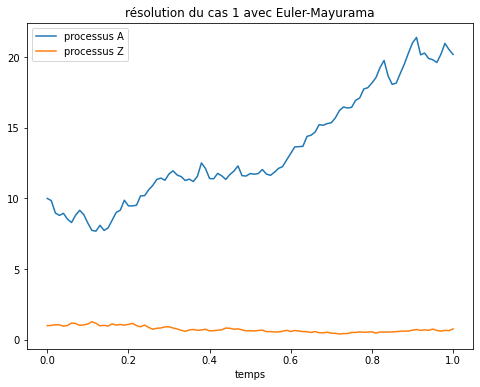

In [19]:
t,A,Z = SDE_Euler_forward()

plt.subplots(figsize=(8,6))
plt.plot(t,A, label = "processus A")
plt.plot(t,Z, label = "processus Z")
plt.xlabel("temps")
plt.title("résolution du cas 1 avec Euler-Mayurama")
plt.legend()

In [21]:
def muA2(mu,A):
    return (mu*A)

def sigmaA2(sigma,A,Z):
    return(sigma*A*np.sqrt(Z))

def sigmaA2_prime(sigma,Z):
    return(sigma*np.sqrt(Z))

def muZ2(alpha,Z):
    return(alpha*Z)

def sigmaZ2(beta,Z):
    return(beta*Z)

def sigmaZ2_prime(beta):
    return (beta)

In [13]:
def SDE_Euler_backward():
    t,mvmtB = CorrelatedBrownian(2,rho_2,T,N)
    
    h = T/N
    A = np.zeros(N+1)
    Z = np.zeros(N+1)
    
    B = mvmtB[0]
    W = mvmtB[1]
    
    A[N] = AT
    Z[N] = ZT
    
    for i in range(N):
        A[N-(i+1)] = A[N-i] - muA2(mu,A[N-i])*h - sigmaA2(sigma,A[N-i],Z[N-i])*(B[i+1]-B[i])
        Z[N-(i+1)] = Z[N-i] - muZ2(beta,Z[N-i])*h - sigmaZ2(beta,Z[N-i])*(W[i+1]-W[i])
        
    return t,A,Z

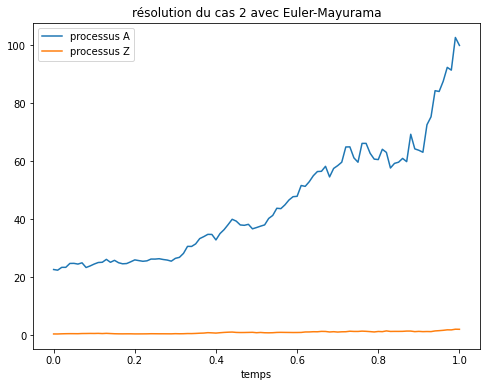

In [22]:
t,A,Z = SDE_Euler_backward()

plt.subplots(figsize=(8,6))
plt.plot(t,A, label = "processus A")
plt.plot(t,Z, label = "processus Z")
plt.xlabel("temps")
plt.title("résolution du cas 2 avec Euler-Mayurama")
plt.legend()

In [27]:
def SDE_Milstein_forward():
    t,mvmtB = CorrelatedBrownian(2,rho_1,T,N)
    h = T/N
    A = np.zeros(N+1)
    Z = np.zeros(N+1)
    
    B = mvmtB[0]
    W = mvmtB[1]
    
    A[0] = A0
    Z[0] = Z0
    
    for i in range(N):
        A[i+1] = A[i] + muA1(mu,A[i])*h + sigmaA1(sigma,A[i],Z[i])*(B[i+1]-B[i]) + 1/2 * sigmaA1(sigma,A[i],Z[i])*sigmaA1_prime(sigma,Z[i])*( (B[i+1]-B[i])**2 - h )
        Z[i+1] = Z[i] + muZ1(alpha,Z[i])*h + sigmaZ1(beta,Z[i])*(W[i+1]-W[i]) + 1/2 * sigmaZ1(beta,Z[i])*sigmaZ1_prime(beta)*( (W[i+1]-W[i])**2 - h )
        
    return t,A,Z

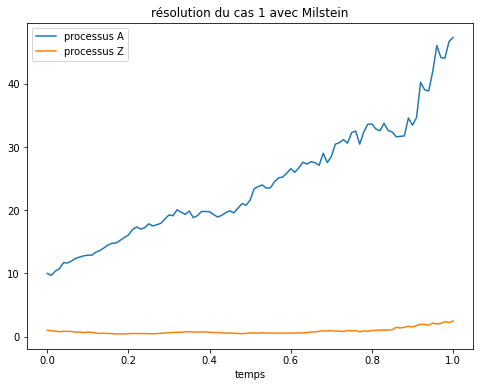

In [29]:
t,A,Z = SDE_Milstein_forward()

plt.subplots(figsize=(8,6))
plt.plot(t,A, label = "processus A")
plt.plot(t,Z, label = "processus Z")
plt.xlabel("temps")
plt.title("résolution du cas 1 avec Milstein")
plt.legend()

In [32]:
def SDE_Milstein_backward():
    t,mvmtB = CorrelatedBrownian(2,rho_2,T,N)
    h = T/N
    A = np.zeros(N+1)
    Z = np.zeros(N+1)
    
    B = mvmtB[0]
    W = mvmtB[1]
    
    A[N] = AT
    Z[N] = ZT
    
    for i in range(N):
        A[N-(i+1)] = A[N-i] - muA2(mu,A[N-i])*h - sigmaA2(sigma,A[N-i],Z[N-i])*(B[i+1]-B[i]) - 1/2 * sigmaA2(sigma,A[N-i],Z[N-i])*sigmaA2_prime(sigma,Z[N-i])*( (B[i+1]-B[i])**2 - h )
        Z[N-(i+1)] = Z[N-i] - muZ2(alpha,Z[N-i])*h - sigmaZ2(beta,Z[N-i])*(W[i+1]-W[i]) - 1/2 * sigmaZ2(beta,Z[N-i])*sigmaZ2_prime(beta)*( (W[i+1]-W[i])**2 - h )
        
    return t,A,Z

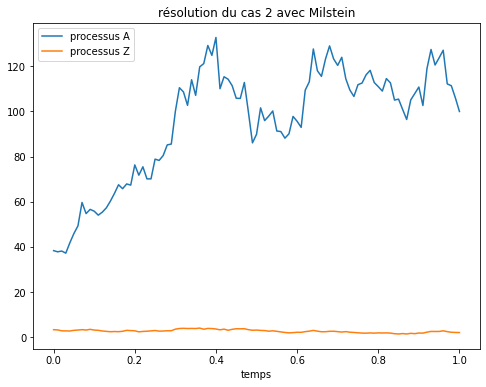

In [35]:
t,A,Z = SDE_Milstein_backward()

plt.subplots(figsize=(8,6))
plt.plot(t,A, label = "processus A")
plt.plot(t,Z, label = "processus Z")
plt.xlabel("temps")
plt.title("résolution du cas 2 avec Milstein")
plt.legend()